In [1]:
import csv
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

with open('AC p1d0,8ed.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter='	')
    raw_data = [row for row in csvreader]       
    headers = raw_data.pop(0)

In [2]:
df = pd.DataFrame(data=raw_data, columns=headers)
print(df.shape)
display(df.head(10))

(662491, 24)


,E1,E2,FP1-A1,F7-A1,F3-A1,T3-A1,C3-A1,P3-A1,T5-A1,O1-A1,...,C4-A2,P4-A2,T6-A2,O2-A2,FPZ-A1,FZ-A2,CZ-A1,PZ-A2,E3,E4
0,0,0,-0.885,-1.149,-0.76,0.416,1.522,0.683,3.434,-9.354,...,-0.184,-2.889,-0.558,0.485,-1.25,0.676,-3.416,-1.082,-6.291,0
1,0,0,-0.633,-0.822,-0.544,0.298,1.089,0.488,2.457,-6.692,...,-0.132,-2.067,-0.399,0.347,-0.894,0.484,-2.444,-0.774,-4.517,0
2,0,0,-0.38,-0.494,-0.327,0.179,0.654,0.293,1.476,-4.021,...,-0.079,-1.242,-0.24,0.209,-0.537,0.291,-1.468,-0.465,-3.042,0
3,0,0,-0.141,-0.184,-0.121,0.067,0.243,0.109,0.549,-1.495,...,-0.029,-0.462,-0.089,0.078,-0.2,0.108,-0.546,-0.173,-1.709,0
4,0,0,0.07,0.091,0.06,-0.033,-0.121,-0.054,-0.272,0.742,...,0.015,0.229,0.044,-0.038,0.099,-0.054,0.271,0.086,-0.333,0
5,0,0,0.244,0.317,0.209,-0.115,-0.419,-0.188,-0.946,2.578,...,0.051,0.796,0.154,-0.134,0.345,-0.186,0.941,0.298,1.079,0
6,0,0,0.373,0.484,0.32,-0.175,-0.641,-0.288,-1.447,3.942,...,0.077,1.217,0.235,-0.204,0.527,-0.285,1.44,0.456,2.294,0
7,0,0,0.456,0.591,0.391,-0.214,-0.784,-0.351,-1.768,4.815,...,0.095,1.487,0.287,-0.25,0.644,-0.348,1.759,0.557,3.004,0
8,0,0,0.495,0.642,0.425,-0.233,-0.851,-0.382,-1.919,5.228,...,0.103,1.615,0.312,-0.271,0.699,-0.378,1.909,0.605,3.057,0
9,0,0,0.497,0.645,0.427,-0.234,-0.855,-0.383,-1.928,5.253,...,0.103,1.622,0.313,-0.272,0.702,-0.38,1.918,0.607,2.576,0


In [3]:
data = {}

for i in range(len(headers)):
    data[headers[i]] = np.array([float(x[i]) for x in raw_data])
    
for k, v in data.items():
    print('{0}: [{1}, ..., {2}]'.format(k, ', '.join([str(x) for x in v[:5]]), ', '.join([str(x) for x in v[-5:]])))

E1: [0.0, 0.0, 0.0, 0.0, 0.0, ..., 17.531, 15.763, 16.174, 15.595, 15.367]
E2: [0.0, 0.0, 0.0, 0.0, 0.0, ..., 11.688, 10.096, 10.356, 9.076, 8.827]
FP1-A1: [-0.885, -0.633, -0.38, -0.141, 0.07, ..., 14.392, 14.764, 15.572, 15.279, 12.325]
F7-A1: [-1.149, -0.822, -0.494, -0.184, 0.091, ..., -1.759, -6.438, -9.229, -9.51, -7.778]
F3-A1: [-0.76, -0.544, -0.327, -0.121, 0.06, ..., -15.131, -17.754, -17.639, -14.155, -8.111]
T3-A1: [0.416, 0.298, 0.179, 0.067, -0.033, ..., -5.981, -10.59, -12.733, -11.928, -8.869]
C3-A1: [1.522, 1.089, 0.654, 0.243, -0.121, ..., -16.84, -19.095, -18.488, -14.263, -7.215]
P3-A1: [0.683, 0.488, 0.293, 0.109, -0.054, ..., -13.175, -15.67, -15.7, -12.36, -6.187]
T5-A1: [3.434, 2.457, 1.476, 0.549, -0.272, ..., -8.069, -13.214, -16.32, -15.852, -11.797]
O1-A1: [-9.354, -6.692, -4.021, -1.495, 0.742, ..., 0.883, -2.915, -4.926, -4.431, -1.888]
FP2-A2: [2.606, 1.864, 1.12, 0.416, -0.207, ..., 12.333, 11.815, 11.868, 11.432, 9.224]
F8-A2: [0.115, 0.082, 0.05, 0.018

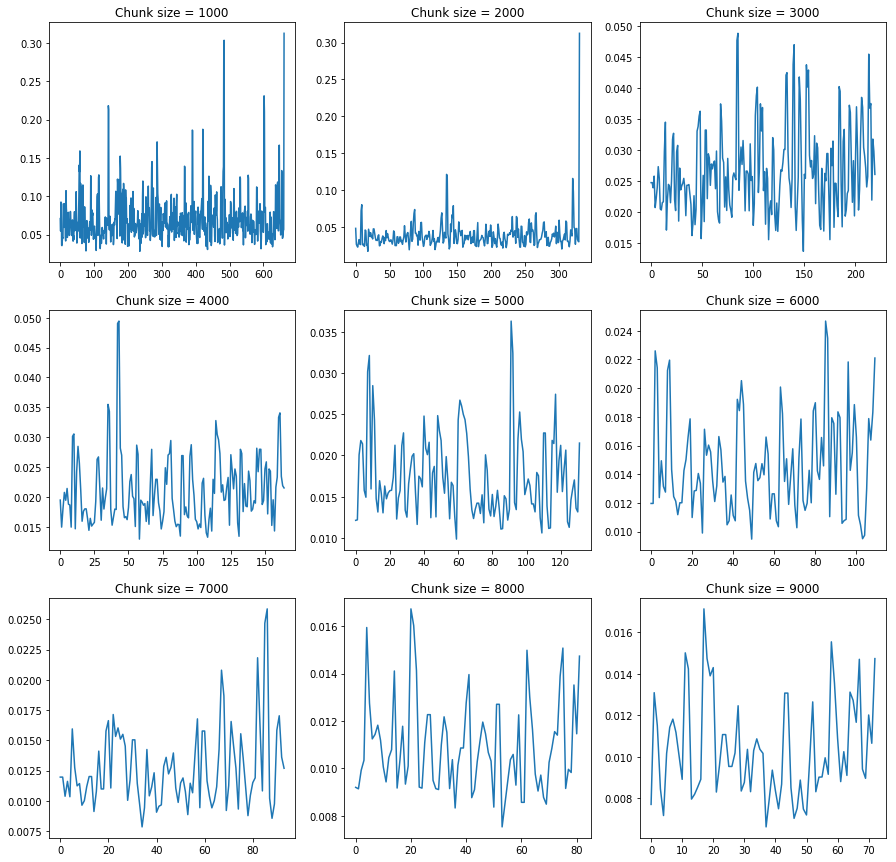

In [6]:
l = data['FP1-A1']
chunk_sizes = list(range(1000, 9001, 1000))
plt.rcParams['figure.figsize'] = [15, 15]

for n in chunk_sizes:
    chunks = (l[i:i+n] for i in range(0, len(l), n))
    cdfs = [dict(zip(sorted(c), scipy.stats.norm.cdf(sorted(c)))) for c in chunks]
    rho = np.empty(len(cdfs) - 1, dtype=float)
    for i in range(len(cdfs) - 1):
        fv, sv, ans = 0, 0, 0
        for value in sorted(set(cdfs[i]) | set(cdfs[i+1])):
            if value in cdfs[i]:
                fv = cdfs[i][value]
            if value in cdfs[i+1]:
                sv = cdfs[i+1][value]
            ans = max(ans, abs(fv - sv))
        rho[i] = ans
    plt.subplot(len(chunk_sizes) // 3, 3, chunk_sizes.index(n) + 1)
    plt.title('Chunk size = {0}'.format(n))
    plt.plot(rho)

plt.show()